# Méthode de Régularisation : Lasso & Ridge 


Dans le domaine des mathématiques et des statistiques, et plus particulièrement dans le domaine de l'apprentissage automatique, la régularisation fait référence à un processus consistant à **ajouter de l'information à un problème pour éviter le surapprentissage. Cette information prend généralement la forme d'une pénalité envers la complexité du modèle.** D'un point de vue bayésien, l'utilisation de la régularisation revient à imposer une distribution a priori sur les paramètres du modèle. 

Avant de commencer, quelque consignes. 



### Objectifs 
Comprendre ces deux apporches en les appliquant sur un cas pratique : le pricing d'un appartement (pour changer) ! 

### Livrables
Vous avez donc 1 livrable à envoyer : ce notebook complété avec les commentaire en conséquence (typiquement quand je demande que remarquez vous ? faite une phrase {sujet, verbe, complément} svp 




## La méthode Lasso 

En statistiques, le lasso est une méthode de contraction des coefficients de la régression développée par Robert Tibshirani dans **un article publié en 1996** intitulé [Regression shrinkage and selection via the lasso](https://pdfs.semanticscholar.org/1b65/af0b2847cf6edb1461eda659f08be27bc76d.pdf).

La méthode Lasso est très utilisé dans les 

Nous cherchons à expliquer de manière linéaire une variable $Y$ , par $p$ variables potentiellement explicatives $X_i$. Pour cela nous faisons $n$ observations et nous modèlisons la variable $Y$ de la manière suivante : $$Y=X \beta + \varepsilon$$

La question maintenant est de savoir quelle variable parmis les $p$ variables ont le plus de poids dans notre explicaton ! C'est donc l'objet de la méthode Lasso.    

Pour plus de détail je vous invite à consulter le cour de Pierre Gaillard et Anisse Ismaili, [Le Lasso, ou comment choisir parmi un grand nombre de variables à l'aide de peu d'observations](http://pierre.gaillard.me/doc/Ga09-report.pdf)


In [0]:
!pip3 install seaborn

In [0]:
#importer vos libs
from sklearn import linear_model
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")


In [0]:
#importer votre dataset
houses = pd.read_csv("./sample_data/kc_house_data.csv")
print(houses.dtypes)
#commenter ce dataset 
# les types de variable
# la target 
# pourquoi utiliser Ridge et pas une régression linéaire 

# Ce sont des données quantitatives
# La target est le prix

# avec une régression linéaire, le modèle n'est pas pénalisé pour ses choix de poids. Un poids important
# est attribué durant la phase d'entraînement s'il sent qu'une feature est particulièrement importante. Cela
# créé parfois de l'overfitting.
# Avec ridge le modèle est pénalisé pour la somme des carrés des poids attribués -> Meilleure distribution, 
# poids plus faibles


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [0]:
#afficher les dimension de votre dataset 
houses.shape

(21613, 21)

In [0]:
#enlever les colonnes non pertinentes
houses = houses.drop(columns=["id", "date", "view"])
houses.shape

(21613, 18)

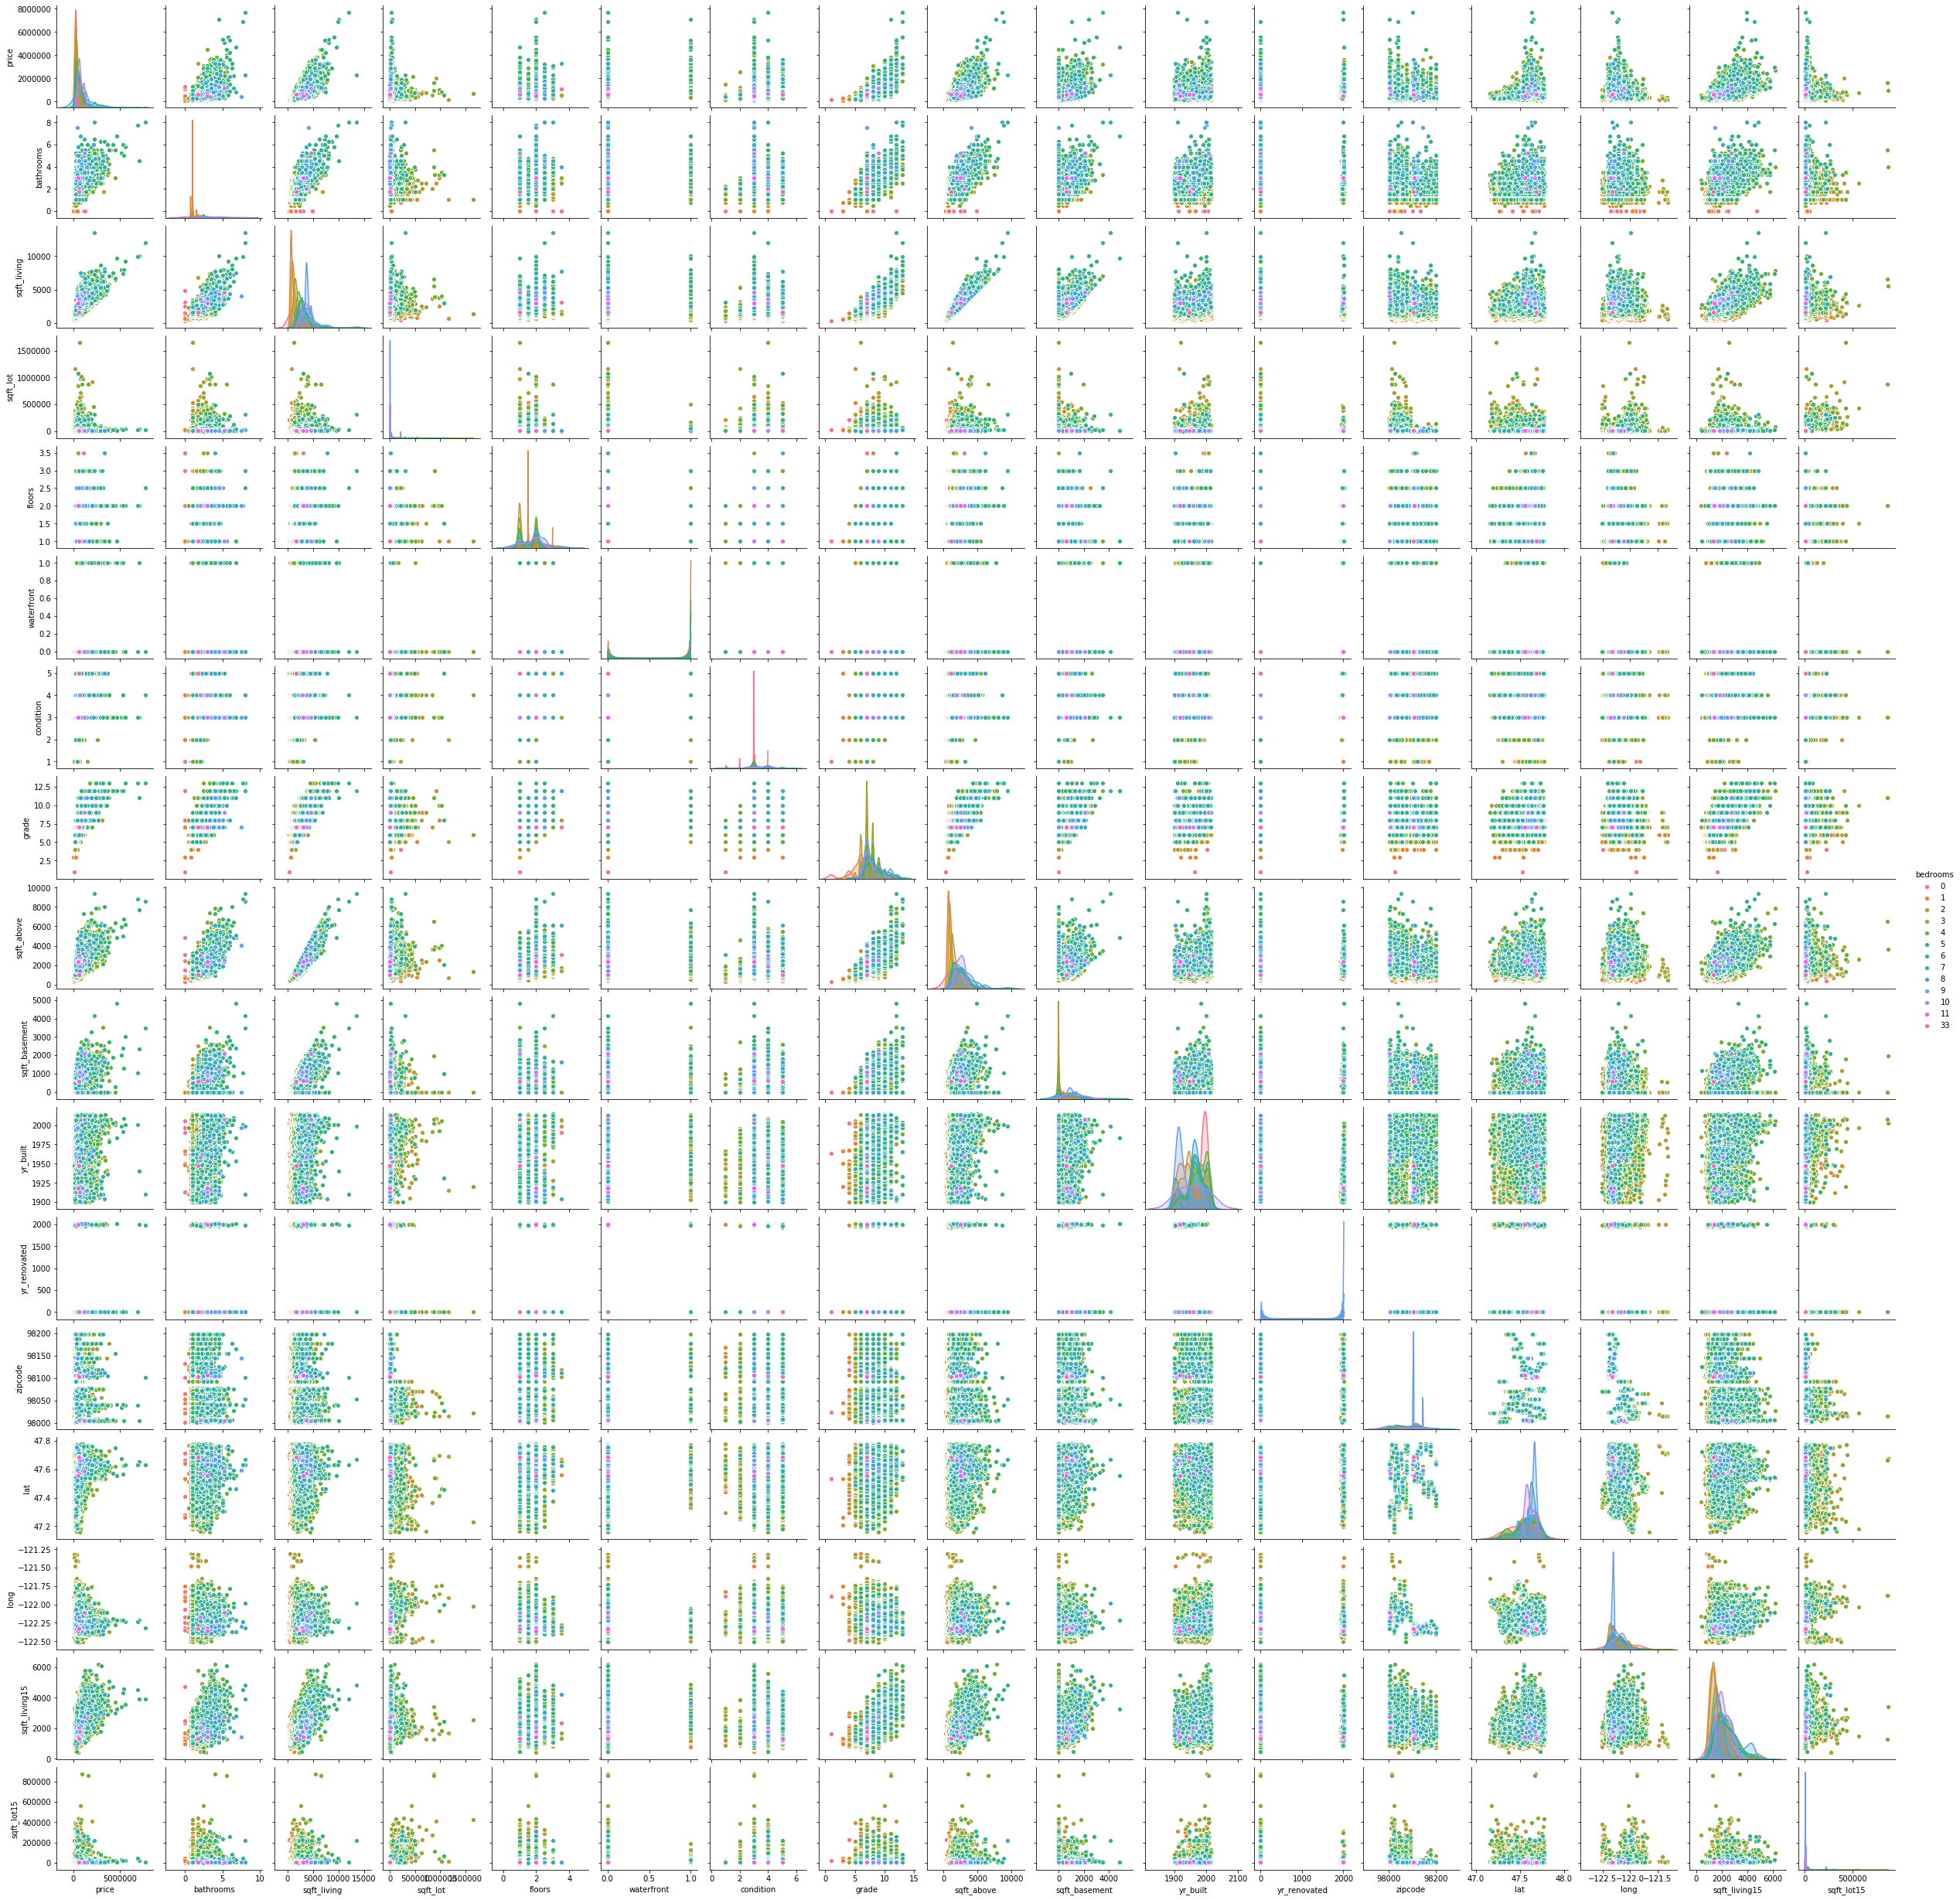

In [0]:
#faire pairplot en mettant en argument bedrooms afin de regarder l'impacte de cette variable  
#que remarquez vous ?
g = sns.pairplot(houses, height=2, hue = 'bedrooms')

In [0]:
#extraire les valeurs du prix (votre vecteur cible) dans une nouvelle variable et afficher sa taille 
Y = houses[["price"]]
print("taille du vecteur cible : " + str(prices.size))

taille du vecteur cible : 21613


In [0]:
#supprimer la variable prix dans votre variable 
#pourquoi drop cette variable ?  
houses = houses.drop(columns=["price"])

# On ne veut pas utiliser le prix comme étant une feature influant sur le prix


In [0]:
#créer une votre varible de travail X 
#rappel : il faut que ce soit un objet numpy ! 

X = houses.to_numpy()


In [0]:
#enregistrer le nom de vos colonnes dans une list
mylist = list(houses.columns)
mylist 


['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [0]:
#créer un 'Lasso estimator'
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=42)
lasso = linear_model.Lasso()
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
#fiter sur votre ensemble de donnée 


In [0]:
#afficher les coefficients 
print('Coeffs : \n', lasso.intercept_)
coefs = lasso.coef_
print(coefs)

Coeffs : 
 [-1400625.09854005]
[-3.82061678e+04  4.16744738e+04  2.81860317e+02  1.18383924e-01
  7.77358965e+03  7.09651614e+05  2.43256126e+04  9.97472003e+04
 -9.91200572e+01 -1.13396225e+02 -2.74992528e+03  2.46546849e+01
 -4.81004207e+02  5.66851775e+05 -2.15334193e+05  3.08266036e+01
 -3.10508621e-01]


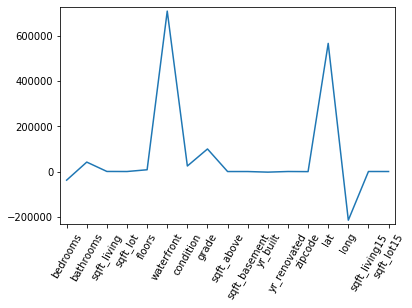

In [0]:
#ploter les coefficients avec les bon noms
#que remarquez vous ?
plt.plot(range(len(mylist)), coefs)
plt.xticks(range(len(mylist)), mylist, rotation=60) 
plt.margins(0.02)
plt.show()

#Le prix augmente en fonction du nombre d'étages, de la rénovation


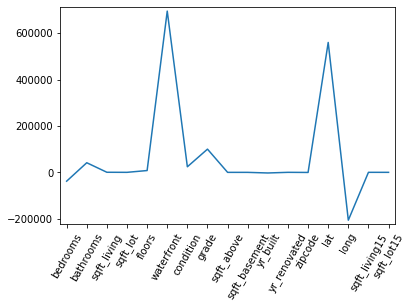

In [0]:
#essayer lasso avec un alpha = 100 et afficher les coefs
#que remarquez vous ? 

X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=42)
lasso = linear_model.Lasso(100)
lasso.fit(X_train, y_train)

coefs = lasso.coef_

plt.plot(range(len(mylist)), coefs)
plt.xticks(range(len(mylist)), mylist, rotation=60) 
plt.margins(0.02)
plt.show()

In [0]:
#afficher la courbe 


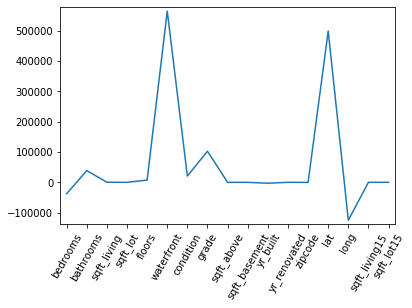

In [0]:
#pareil avec un alpha = 1000 et afficher les coefs
#que remarquez vous cette fois ci? 
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=42)
lasso = linear_model.Lasso(alpha=1000)
lasso.fit(X_train, y_train)

coefs = lasso.coef_

plt.plot(range(len(mylist)), coefs)
plt.xticks(range(len(mylist)), mylist, rotation=60) 
plt.margins(0.02)
plt.show()

In [0]:
#afficher la courbe 


## La cross validation 
La validation croisée (ou cross-validation) est en apprentissage automatique, une méthode d’estimation de fiabilité d’un modèle fondé sur une technique d’échantillonnage. 

**Rechercher ce qu'est une cross-validation et faite appliquer la sur votre dataset, afficher votre score moyen pour 5 itérations**

In [0]:
#afficher votre tableau de cross validation ainsi que la moyenne 

X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=42)
lassoCV = linear_model.LassoCV(max_iter=5)
lassoCV.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=5, n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [0]:
print(lassoCV.score(X, Y))

0.5226143159874065


# Régressions Régularisées

La régularisation consiste à introduire une notion de pénalité dans notre manière de mesurer l'érreur (la somme des erreurs au carré pour nous) cela nous permet donc d'inférer sur nos paramètres. Il faut ajuster ce terme de régularisation dans le but d’obtenir un modèle de meilleure qualité. 

La régularisation de Tikhonov, plus connue sous le nom de **"ridge regression"** est une méthode qui consiste à ajouter une contrainte sur les coefficients lors de la modélisation pour maîtriser l’amplitude de leurs valeurs (« pour éviter qu’elles partent dans tous les sens »)

On va donc essayé d'appliquer Ridge sur nos données.

In [0]:
#définir un range de 50 valeur de 10-4 à 1 avec la fonction logspace  
#que fait la fonction logspace de numpy? 
range = np.logspace(0.0001, 1, num=50)
range


array([ 1.00023029,  1.04834957,  1.09878379,  1.15164431,  1.20704786,
        1.26511677,  1.32597927,  1.38976976,  1.45662909,  1.52670491,
        1.60015195,  1.67713239,  1.75781623,  1.84238162,  1.9310153 ,
        2.02391298,  2.12127981,  2.22333079,  2.33029125,  2.44239739,
        2.55989675,  2.6830488 ,  2.81212547,  2.94741179,  3.08920649,
        3.23782268,  3.39358853,  3.556848  ,  3.72796159,  3.90730714,
        4.09528069,  4.29229731,  4.49879204,  4.71522087,  4.9420617 ,
        5.17981544,  5.42900708,  5.69018689,  5.96393159,  6.25084566,
        6.55156264,  6.86674659,  7.19709347,  7.54333274,  7.90622897,
        8.28658349,  8.68523618,  9.10306733,  9.5409996 , 10.        ])

In [0]:
#créer 2 tableaux pour stocker les résultat 
# un tableau pour le scrore moyen de la cross-validation (10 epoch)
# un tableau pour la variance moyenne 


In [0]:
#instancier un 'Ridge estimator' normalisé 
#A quoi sert la normalisation ? 


In [0]:
#faire une boucle sur les alpha 
# --> but : voir l'effet du paramètre alpha sur l'accuracy   
#
#        INDICE 
#
# pour chaque alpha faite 10 cross-validation 
# ajouter les résultats à vos tableaux 
#que remarquez vous ? 


Utiliser la fonction ci-dessous, expliquer la et commenter le résultat : 
```python
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()


```

In [0]:
#que remarquez vous par rapport au coefficient alpha ? 
